In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
NetReward = 515777
NetPull = 23729
TOT_MACHINE = 24

def test_pull(user_group, secret_key, machine_num):
    global NetReward
    global NetPull
    
    NetReward = NetReward + 1
    NetPull = NetPull + 1
    
    return {'Arm': str(machine_num), 'NetReward': NetReward, 'Pull':NetPull, 'Reward':  np.random.randint(0, 100)}

In [12]:
output = test_pull('test_user','aaaaaaaa',21)
output

{'Arm': '21', 'NetReward': 515778, 'Pull': 23730, 'Reward': 31}

In [13]:
#################################################################################################

def uniform_explor(user_group, secret_key, N, tot_rounds):
    cum_reward = 0
    
    cum_result = {
        "round":[],
        "arm_pulled":[],
        "reward":[],
        "cum_reward":[]
    }
    
    # Initialize the result dict with arms and statistics
    result = {idx: {
                    "Arm": idx,
                    "Output_Arm": 0,
                    "N_List": [], # Rewards gotten during Exploration
                    "Reward_List": [], # Rewards obtained throughout rounds
                    "Round_List": [], # Rounds which the arm is pulled,
                    } for idx in range(TOT_MACHINE)
             }
    
    # Calculates the number of rounds left for Exploitation
    cut_off = tot_rounds - (TOT_MACHINE*N)
    
    # If number of rounds for Exploitation <= 0, do not pull
    if cut_off <= 0:
        print("Insufficient Total Rounds")
    
    else:
        arm = 0
        
        for num_round in range(tot_rounds):
            
            # If iterating through Exploration rounds
            if (num_round + 1) <= (TOT_MACHINE*N):
                # Simulate pulling an arm and getting an output
                # output = test_pull(user_group,secret_key,arm)
                output = pull(user_group,secret_key,arm)
                
                cum_result["arm_pulled"].append(arm)
                
                print(f"#{num_round}: {output}")
                
                result[arm]["Output_Arm"] = output["Arm"]
                result[arm]["Reward_List"].append(output["Reward"])
                result[arm]["Round_List"].append(num_round)
                
                result[arm]["N_List"].append(output["Reward"])
                
                # Iterate through the machines 
                if arm == (TOT_MACHINE - 1):
                    arm = 0
                else:
                    arm = arm + 1                

            # If Exploration rounds are over, enter Exploitation rounds
            else:              
                # Identify the arm with the highest average Reward value across N_list
                arm = max(result, key=lambda k: sum(result[k]["N_List"]))
                
                # Simulate pulling an arm and getting an output
                # output = test_pull(user_group,secret_key,arm)
                output = pull(user_group,secret_key,arm)
                
                cum_result["arm_pulled"].append(arm)
                
                print(f"#{num_round}: {output}")
            
                result[arm]["Output_Arm"] = output["Arm"]
                result[arm]["Reward_List"].append(output["Reward"])
                result[arm]["Round_List"].append(num_round)
            
            cum_reward += output["Reward"]
            
            cum_result["round"].append(num_round + 1)
            cum_result["reward"].append(output["Reward"])
            cum_result["cum_reward"].append(cum_reward)
        
        list_result = [
            {
                **v, 
                "Total_Reward": sum(v["Reward_List"]),
                "Avg_N": sum(v["N_List"]) / len(v["N_List"]),
                "Avg_Reward": sum(v["Reward_List"]) / len(v["Reward_List"])
            } for v in result.values()
        ]
            
        return list_result, cum_result

#################################################################################################


In [14]:
def regret(result, tot_round, cum_result):
    best_result = max(result, key=lambda x:len(x["Reward_List"]))
    
    print(best_result)
    print(f"Best Arm: {best_result['Arm']} with an average reward of {best_result['Avg_Reward']}")
    
    df = pd.DataFrame(cum_result)
    
    df["regret"] = (df["round"]*best_result["Avg_Reward"]) - df["cum_reward"]
    
    plt.plot(df["round"], df["regret"])
    plt.xlabel("No. of Rounds")
    plt.ylabel("Total Regret")
    plt.show()
    
    return df
    

# Testing

In [15]:
# tot_rounds = 500
# N_rounds = 10

# result, cum_result = uniform_explor("test_user", "aaaaaaaa", N_rounds, tot_rounds)

# print("\n##########################################################################################")
# print("Total Runs")
# print("##########################################################################################\n")
# # for elem in result:
# #     print(elem)

# print("\n##########################################################################################")
# print("Regret Plot")
# print("##########################################################################################\n")
# result_df = regret(result, tot_rounds, cum_result)

# # Save regret dataframe as csv
# # regret_df.to_csv('uniform_explor.csv', index=False)

# result_df



#0: {'Arm': '0', 'NetReward': 838138, 'Pull': 39330, 'Reward': 3}
#1: {'Arm': '1', 'NetReward': 838153, 'Pull': 39331, 'Reward': 15}
#2: {'Arm': '2', 'NetReward': 838178, 'Pull': 39332, 'Reward': 25}
#3: {'Arm': '3', 'NetReward': 838194, 'Pull': 39333, 'Reward': 16}
#4: {'Arm': '4', 'NetReward': 838217, 'Pull': 39334, 'Reward': 23}
#5: {'Arm': '5', 'NetReward': 838230, 'Pull': 39335, 'Reward': 13}
#6: {'Arm': '6', 'NetReward': 838248, 'Pull': 39336, 'Reward': 18}
#7: {'Arm': '7', 'NetReward': 838269, 'Pull': 39337, 'Reward': 21}
#8: {'Arm': '8', 'NetReward': 838284, 'Pull': 39338, 'Reward': 15}
#9: {'Arm': '9', 'NetReward': 838303, 'Pull': 39339, 'Reward': 19}
#10: {'Arm': '10', 'NetReward': 838321, 'Pull': 39340, 'Reward': 18}
#11: {'Arm': '11', 'NetReward': 838331, 'Pull': 39341, 'Reward': 10}
#12: {'Arm': '12', 'NetReward': 838337, 'Pull': 39342, 'Reward': 6}
#13: {'Arm': '13', 'NetReward': 838359, 'Pull': 39343, 'Reward': 22}
#14: {'Arm': '14', 'NetReward': 838368, 'Pull': 39344, '

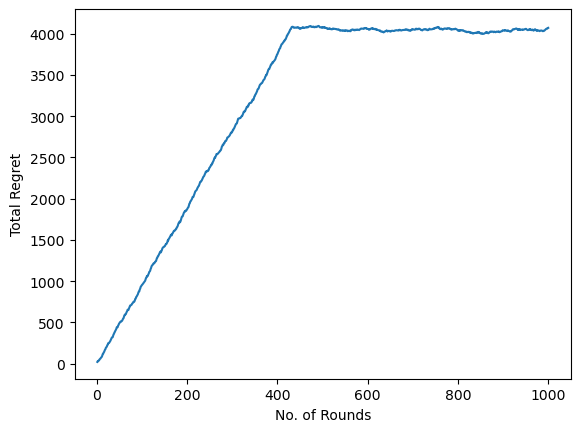

,round,arm_pulled,reward,cum_reward,regret
0,1,0,3,3,21.558020
1,2,1,15,18,31.116041
2,3,2,25,43,30.674061
3,4,3,16,59,39.232082
4,5,4,23,82,40.790102
...,...,...,...,...,...
995,996,21,22,20402,4057.788396
996,997,21,22,20424,4060.346416
997,998,21,25,20449,4059.904437
998,999,21,16,20465,4068.462457


In [16]:
from server_pull import pull

tot_rounds = 1000
N_rounds = 18

result,cum_result = uniform_explor('user40','XEq6wByD', N_rounds, tot_rounds)

print("\n##########################################################################################")
print("Total Runs")
print("##########################################################################################\n")
# for elem in result:
#     print(elem)

print("\n##########################################################################################")
print("Regret Plot")
print("##########################################################################################\n")
result_df = regret(result, tot_rounds, cum_result)

result_df


In [19]:
# Save regret dataframe as csv
result_df.to_csv('./csv_data/uniform_explor.csv', index=False)
print("Complete")

Complete


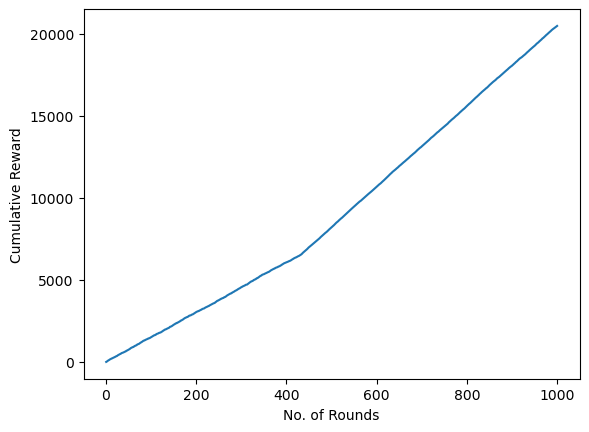

In [20]:
plt.plot(result_df["round"], result_df["cum_reward"])
plt.xlabel("No. of Rounds")
plt.ylabel("Cumulative Reward")
plt.show()